# Reading Images

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import random
import math
import csv
import cv2
import os

In [3]:
inputBasePath    = r".\images"
outputBasePath =  r".\imagearrays" 

In [4]:
image_width = 224
image_height = 224

In [5]:
classes = ['cat','dog']

In [6]:
os.chdir(inputBasePath) 

X = [] 
Y = []

i = 0
for class1 in classes:
  os.chdir(class1) 
  print('=> '+class1) 
  for files in os.listdir('./'):
    img = cv2.imread(files)
    img = cv2.resize(img, (image_width,image_height)) 
    X.append(img) 
    Y.append(class1) 
    i = i + 1
  os.chdir('..')
  
print("X : ",len(X))
print("Y : ",len(Y))

X = np.array(X).reshape(-1,image_width,image_height,3) 
Y = np.array(Y) 

print("X : ",X.shape)
print("Y : ",Y.shape)

print("X : ",len(X))
print("Y : ",len(Y))

os.chdir('..')
os.chdir("imagearrays")

np.save(str(image_width)+'x'+str(image_height)+'_images', X)

np.save(str(image_width)+'x'+str(image_height)+'_labels', Y) 

print("[ INFO - STAGE1 ]  NUMPY ARRAY CREATION COMPLETED \n ")

=> cat
=> dog
X :  244
Y :  244
X :  (244, 224, 224, 3)
Y :  (244,)
X :  244
Y :  244
[ INFO - STAGE1 ]  NUMPY ARRAY CREATION COMPLETED 
 


# Classification

In [7]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPool2D 
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

data önce numpy array olarak kaydedilen görüntüleri (data) ve sınıf (label) etiketlerini oku

In [8]:
data = np.load(r"..\imagearrays\224x224_images.npy")
labels = np.load(r"..\imagearrays\224x224_labels.npy")
data.shape

(244, 224, 224, 3)

In [9]:
labels

array(['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog',

### Label Encoding


In [10]:
labelEn = LabelEncoder() #string olan etiketleri 0 1 2 şeklinde kodla
labels = labelEn.fit_transform(labels)
labels = to_categorical(labels)

In [11]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

### Train - Test Split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = .20, shuffle = True)


print(
"""
x_train shape: {}
x_test shape: {}
y_train shape: {}
y_test shape: {}

""".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))


x_train shape: (195, 224, 224, 3)
x_test shape: (49, 224, 224, 3)
y_train shape: (195, 2)
y_test shape: (49, 2)




# Normalization

In [13]:
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

### Train - Validation Split

In [14]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = .10, shuffle = True,random_state=42)

### Creating model 

In [15]:
def model2(input_shape=(image_width ,image_height ,3), num_classes = 2):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
    model.add(Conv2D(64,kernel_size=(3, 3), activation='relu',padding = 'Same',))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(128, (3, 3), activation='relu',padding = 'Same'))
    model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax')) 
    
    return model

In [16]:
model = model2()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      73792     
                                                        

#### Optimizer

In [17]:
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999,  weight_decay=0.0, amsgrad=False)

#### Set Learning Rate annealer

In [18]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1,  factor=0.5, min_lr=0.00001)

#### Compile model

In [19]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

##### epoch ve batch size tanımla

epoch = model kaç iterasyon çalışacak
batch size = resimler modele bit dizisi matrisleri olarak alınır. her bir adımda kaç resmin bit dizisi alınacak, yani kaç resim alınacak. bir seferde alınan resimler yığın (batch), yığındaki resim sayısı batch size

cost fonksiyonu her bir batch için hesaplanır, buna göre geri yayılım yapılır. her bir resim için yapılsaydı süreç uzardı (belki hesap daha hassas olurdu). batch size azaldıkça daha ince hesap yapılır ama süreç uzar, batch size artarsa cost hesabı daha üstünkörü olur, başarı düşebilir. bu nedenle batch size optimum şekilde seçilmeli.

In [37]:
epc = 10
bs = 8

##### modeli çalıştır

modeli fit edince çalışır. modelin her bir aşamasındaki sonuçlar history değişkenine raporlanır.


In [24]:
history = model.fit(x = x_train,y=y_train, batch_size=bs,
                              epochs = epc, validation_data = (x_validate,y_validate),
          verbose = 1, callbacks=[learning_rate_reduction])

Epoch 1/10
22/22 [==============================] - 48s 2s/step - loss: 0.8823 - accuracy: 0.4800 - val_loss: 0.6934 - val_accuracy: 0.3500 - lr: 1.0000e-04
Epoch 2/10
22/22 [==============================] - 44s 2s/step - loss: 0.6783 - accuracy: 0.5543 - val_loss: 0.6983 - val_accuracy: 0.6000 - lr: 1.0000e-04
Epoch 3/10
22/22 [==============================] - 43s 2s/step - loss: 0.6825 - accuracy: 0.5714 - val_loss: 0.7016 - val_accuracy: 0.4500 - lr: 1.0000e-04
Epoch 4/10
22/22 [==============================] - 43s 2s/step - loss: 0.6516 - accuracy: 0.6171 - val_loss: 0.7129 - val_accuracy: 0.4000 - lr: 1.0000e-04
Epoch 5/10
22/22 [==============================] - ETA: 0s - loss: 0.6389 - accuracy: 0.6457
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
22/22 [==============================] - 42s 2s/step - loss: 0.6389 - accuracy: 0.6457 - val_loss: 0.6888 - val_accuracy: 0.4500 - lr: 1.0000e-04
Epoch 6/10
22/22 [==============================] - 43s 

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

#### Doğruluk grafiklerini çiz

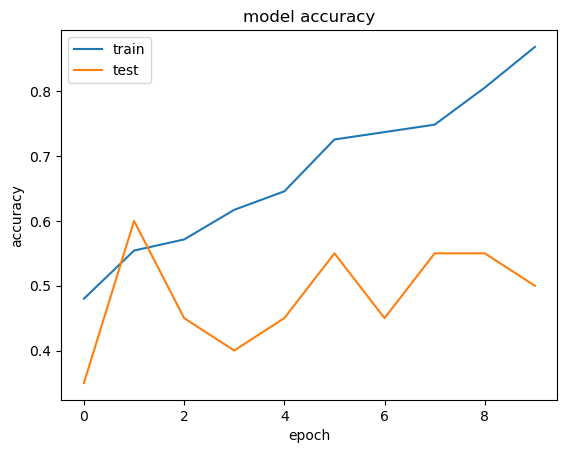

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Hata grafiklerini çiz

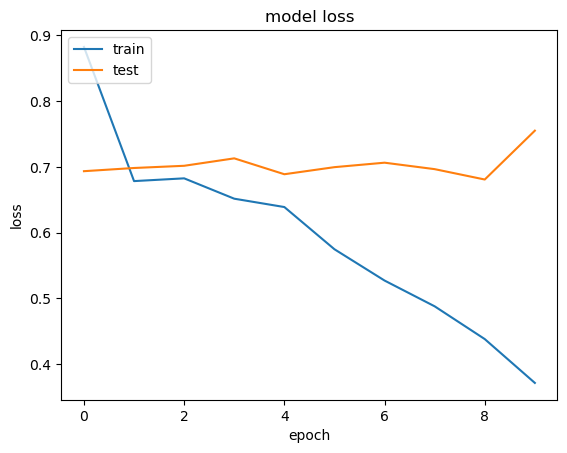

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

2/2 [==============================] - 3s 949ms/step


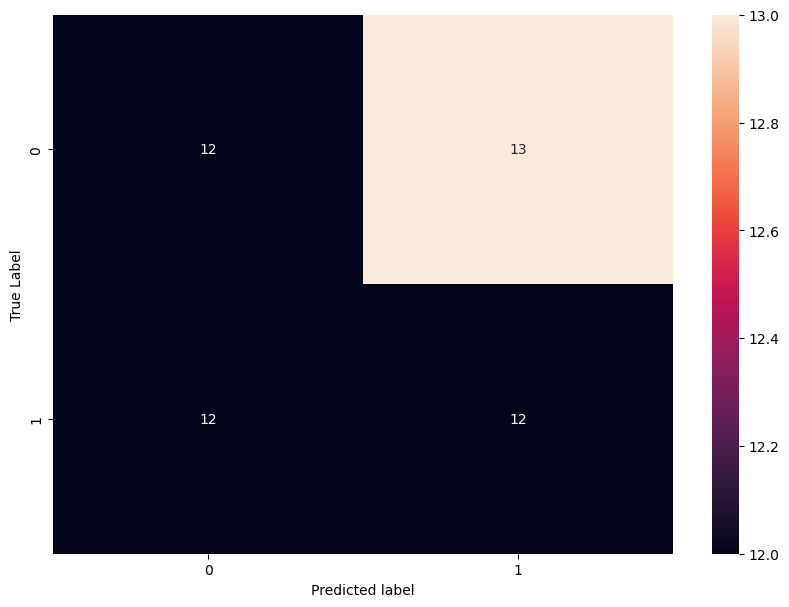

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(x_test)   
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1)  #test süreci için Y_true = np.argmax(y_test,axis = 1)
cm = confusion_matrix(Y_true, Y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(Y_true, Y_pred_classes)
print(report)

İstenirse eğitilen model daha sonra kullanılmak üzere, hesaplanan ağırlıkları ile kaydedilebilir. bunun için de bir yol tanımlaması yapabiliriz.

In [20]:
  os.chdir(r".\models") 
  model.save('model1.h5')


KeyboardInterrupt



##### testing

In [32]:
preds = model.predict(x_test)
y_pred = np.zeros_like(preds)
y_pred[np.arange(len(preds)), preds.argmax(1)] = 1
classes = ['cat','dog']
confusionMatrix = np.zeros((len(classes),len(classes)))

for i in range(len(y_test)):

  if np.array_equal(y_pred[i],y_test[i]):
    index = np.argmax(y_test[i])
    confusionMatrix[index,index] += 1

  else:

    index1 = np.argmax(y_test[i])
    index2 = np.argmax(y_pred[i])
    confusionMatrix[index1,index2] += 1

2/2 [==============================] - 3s 844ms/step


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.50      0.48      0.49        25
           1       0.48      0.50      0.49        24

   micro avg       0.49      0.49      0.49        49
   macro avg       0.49      0.49      0.49        49
weighted avg       0.49      0.49      0.49        49
 samples avg       0.49      0.49      0.49        49

Accuracy Score : 
0.4897959183673469
--------------------------------------------------
Confusion Matrix : 
[[12. 13.]
 [12. 12.]]
--------------------------------------------------


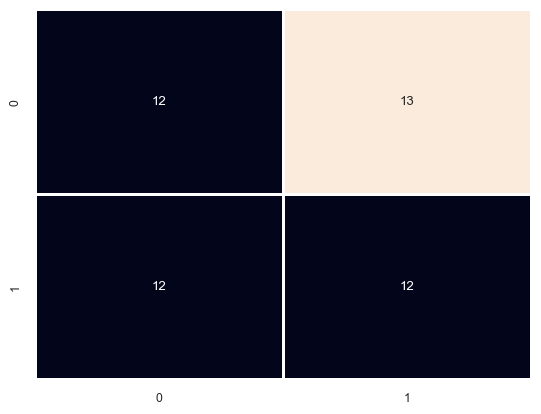

In [33]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
print("CLASSIFICATION REPORT")
print(classification_report(y_test, y_pred))
print("Accuracy Score : ")
print(accuracy_score(y_test, y_pred))
cm = accuracy_score(y_test, y_pred)
sns.set(font_scale=0.8)
sns.heatmap(confusionMatrix,annot=True, linewidths=1.0, cbar=False)
print("--------------------------------------------------")
print("Confusion Matrix : ")
print(confusionMatrix)
print("--------------------------------------------------")

## Data Augmentation

In [34]:
datagen = ImageDataGenerator(  
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False
                        )
datagen.fit(x_train) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


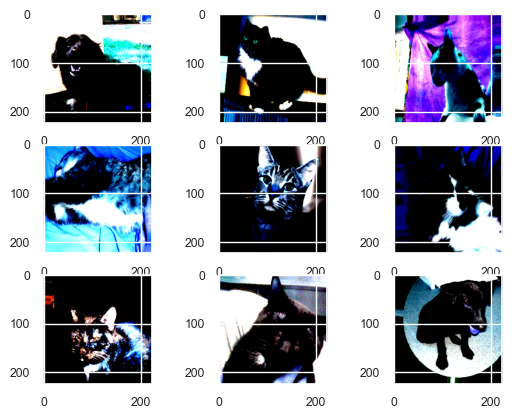

In [35]:
from matplotlib import pyplot
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(224, 224,3))
	# show the plot
	pyplot.show()
	break

### Veri arttırımı ile birlikte modeli fit et
Veri arttırımı uygulayarak modeli tekrar fit et ve sonuçları izle
Bunun için fit_generator metodu kullanılır.

In [38]:
history = model.fit_generator(datagen.flow(np.array(x_train),np.array(y_train), batch_size=bs), 
                              epochs = epc, validation_data = datagen.flow(np.array(x_validate),
                             np.array(y_validate),batch_size=bs),verbose = 1, 
                              steps_per_epoch=x_train.shape[0] // bs, 
                              callbacks=[learning_rate_reduction])

C:\Users\sahba\AppData\Local\Temp\ipykernel_18976\830519728.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(np.array(x_train),np.array(y_train), batch_size=bs),


Epoch 1/10
21/21 [==============================] - 45s 2s/step - loss: 0.6117 - accuracy: 0.6946 - val_loss: 0.6109 - val_accuracy: 0.6500 - lr: 2.5000e-05
Epoch 2/10
21/21 [==============================] - 42s 2s/step - loss: 0.5772 - accuracy: 0.7006 - val_loss: 0.6715 - val_accuracy: 0.5500 - lr: 2.5000e-05
Epoch 3/10
21/21 [==============================] - 42s 2s/step - loss: 0.5616 - accuracy: 0.6886 - val_loss: 0.6861 - val_accuracy: 0.5500 - lr: 2.5000e-05
Epoch 4/10
21/21 [==============================] - ETA: 0s - loss: 0.6002 - accuracy: 0.7066
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.
21/21 [==============================] - 43s 2s/step - loss: 0.6002 - accuracy: 0.7066 - val_loss: 0.7055 - val_accuracy: 0.5500 - lr: 2.5000e-05
Epoch 5/10
21/21 [==============================] - 42s 2s/step - loss: 0.5560 - accuracy: 0.7126 - val_loss: 0.6308 - val_accuracy: 0.6000 - lr: 1.2500e-05
Epoch 6/10
21/21 [==============================] - 42s 

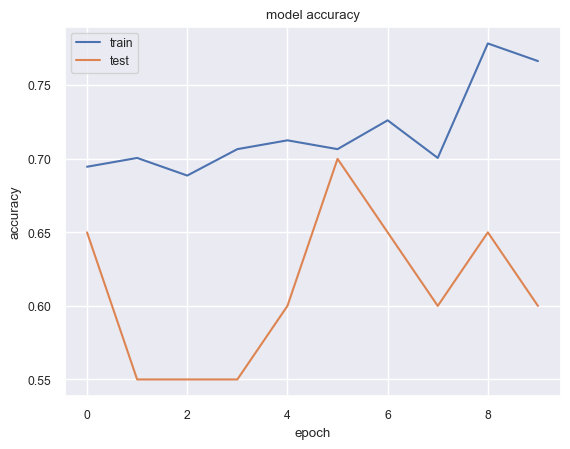

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

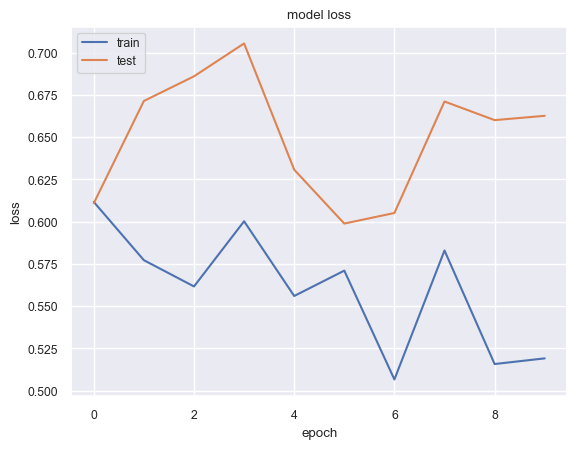

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### PRE_TRAINED MODEL (VGG16)

In [41]:
from keras.applications.vgg16 import VGG16, preprocess_input
base_model = VGG16(
    weights="imagenet",
    include_top=False, 
    input_shape=(image_width ,image_height ,3)
)

58889256/58889256 [==============================] - 13s 0us/step


In [42]:
NUM_CLASSES=2
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.layers[0].trainable = False 

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_3 (Dropout)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14764866 (56.32 MB)
Trainable params: 50178 (196.01 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [47]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [48]:
history = model.fit(x_train,y_train, batch_size=bs,
                              epochs = epc, validation_data = (x_validate,y_validate),
                              verbose = 1, callbacks=[learning_rate_reduction])

Epoch 1/10
22/22 [==============================] - 48s 2s/step - loss: 0.8003 - accuracy: 0.6171 - val_loss: 0.4399 - val_accuracy: 0.8000 - lr: 1.0000e-04
Epoch 2/10
22/22 [==============================] - 46s 2s/step - loss: 0.3992 - accuracy: 0.8229 - val_loss: 0.3352 - val_accuracy: 0.8000 - lr: 1.0000e-04
Epoch 3/10
22/22 [==============================] - 44s 2s/step - loss: 0.3115 - accuracy: 0.8629 - val_loss: 0.3499 - val_accuracy: 0.8500 - lr: 1.0000e-04
Epoch 4/10
22/22 [==============================] - 46s 2s/step - loss: 0.2039 - accuracy: 0.9200 - val_loss: 0.2633 - val_accuracy: 0.8500 - lr: 1.0000e-04
Epoch 5/10
22/22 [==============================] - 45s 2s/step - loss: 0.1683 - accuracy: 0.9543 - val_loss: 0.2758 - val_accuracy: 0.8500 - lr: 1.0000e-04
Epoch 6/10
22/22 [==============================] - ETA: 0s - loss: 0.1241 - accuracy: 0.9657
Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
22/22 [==============================] - 45s 

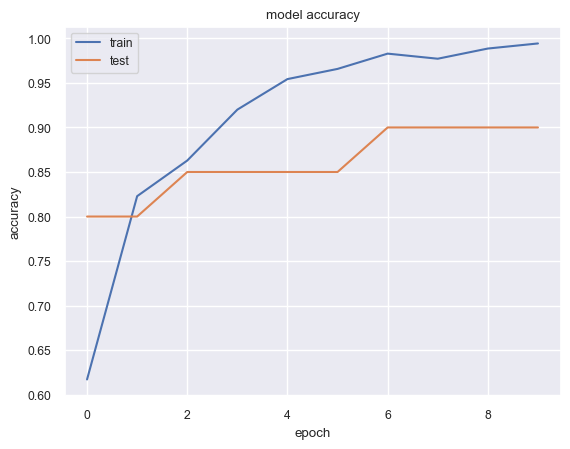

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

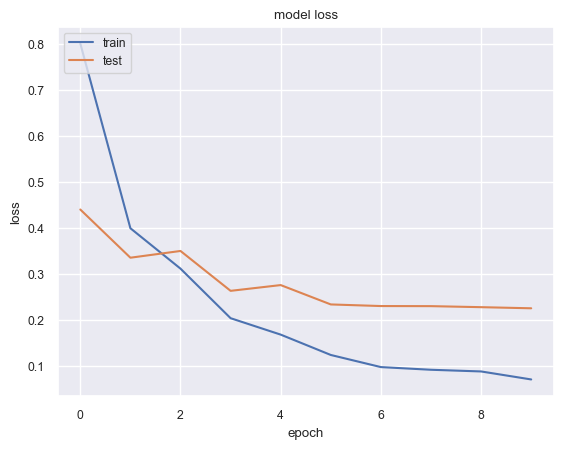

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()